<a href="https://colab.research.google.com/github/gomachinelearning/Blogs/blob/master/Gradient_Descent2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Orly Esteban, MS Data Science, Indiana University
Aldie, VA
Email: ocesteban@gmail.com

This code accompanies Orly's blog post at https://medium.com/@orly_esteban/gradient-descent-everything-a-data-scientist-should-know-c7eb8b347735

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [0]:
m = 100 # number of data rows
X = 6 * np.random.rand(m, 1) - 3

theta0 = 5
theta1 = 3
y = theta0 + theta1 * X 


In [0]:
X_new = np.c_[np.ones(X.shape), X]

#retuns the cost for a given pair of thetas 
def cost_given_a_pair_of_thetas(theta):
  theta = theta.T
  y_pred_theta = X_new.dot(theta)
  return np.sqrt(mean_squared_error(y, y_pred_theta))

# calculate costs for a given collection of thetas
def costs_all_thetas (thetas):
    costs = np.array([cost_given_a_pair_of_thetas(theta) for theta in thetas])
    return costs


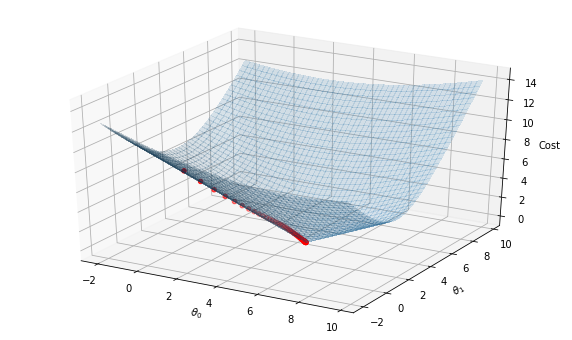

In [4]:
theta0s=[] # list of the first weight parameter (theta zero)
theta1s=[] # list of the second weight parameter (theta one)
m=100 # there are 100 data rows


def gradient_descent(initial_thetas, lr,iterations):   
  theta0s.append(initial_thetas[0])
  theta1s.append(initial_thetas[1])
  theta=theta0
  for iteration in range(iterations):
    y_pred = X_new.dot(theta)
    gradient = (2/m) * X_new.T.dot((y_pred - y))
    theta = theta - lr * gradient
    theta0s.append(theta[0])
    theta1s.append(theta[1])

theta0=np.random.randn(2,1)
gradient_descent(theta0,0.03,100 )

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
t0s = np.arange(-2, 10, 0.25)
t1s = np.arange(-2, 10, 0.25)
t0s, t1s = np.meshgrid(t0s, t1s)
thetas = np.c_[t0s.ravel(), t1s.ravel()]
costs= costs_all_thetas(thetas).reshape(t0s.shape)
surf = ax.plot_surface(t0s,t1s, costs, rstride=1, cstride=1, alpha=0.15, linewidth=0, antialiased=False)



thetas = np.c_[theta0s,theta1s]
costs = costs_all_thetas(thetas)
ax.scatter(theta0s, theta1s, costs, color="r")


ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")
ax.set_zlabel('Cost')

plt.show()

In [5]:
theta0s[100],theta1s[100]

(array([4.98885678]), array([3.00205621]))